In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential


In [2]:
def get_stock_data():
  url = r"C:\Users\Roshan Salunke\Downloads\RELIANCE.NS (2).csv"
  col_names = ['Date', 'Open', 'High','Low', 'Close', 'Volume', 'Adj Close']

  df = pd.read_csv(url, header=0, names=col_names)

  df = pd.DataFrame(df)

  date_split = df['Date'].str.split('-').str

  df['Year'], df['Month'], df['Day'] = date_split

  df['Volume'] = df['Volume']/1000

  return df

In [3]:
df = get_stock_data()

C:\Users\Roshan Salunke\AppData\Local\Temp\ipykernel_2684\3680966089.py:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2008-01-01,715.715759,816.757935,525.023315,613.905762,0.550408,402391654,2008,01,01
1,2008-02-01,616.654724,654.297913,553.503357,610.079529,0.546977,221082696,2008,02,01
2,2008-03-01,594.316467,601.399353,525.023315,561.131042,0.503092,260177041,2008,03,01
3,2008-04-01,569.353088,673.119507,555.608398,647.487488,0.580516,239691023,2008,04,01
4,2008-05-01,647.487488,749.396484,591.951416,595.232788,0.533666,202767888,2008,05,01


In [5]:
df = df.drop(['Date', 'Low', 'Adj Close', 'Year', 'Month', 'Day'], axis=1)
df.head()

,Open,High,Close,Volume
0,715.715759,816.757935,613.905762,0.550408
1,616.654724,654.297913,610.079529,0.546977
2,594.316467,601.399353,561.131042,0.503092
3,569.353088,673.119507,647.487488,0.580516
4,647.487488,749.396484,595.232788,0.533666


In [6]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Close'] = df['Close']/100
df['Volume'] = df['Volume']*10

In [7]:
df.head()

,Open,High,Close,Volume
0,7.157158,8.167579,6.139058,5.504079
1,6.166547,6.542979,6.100795,5.469774
2,5.943165,6.013994,5.611310,5.030916
3,5.693531,6.731195,6.474875,5.805161
4,6.474875,7.493965,5.952328,5.336663


In [8]:
df.isnull().sum()

Open      0
High      0
Close     0
Volume    0
dtype: int64

In [9]:
nan_value_index = []

high = df.High.isnull()
for i in range(0, len(high)):
    if high[i] == 1:
        nan_value_index.append(1)
        df['High'][i] = 0
        
        
open = df.Open.isnull()
for i in range(0, len(open)):
    if open[i] ==1:
        nan_value_index.append(1)
        df['Open'][i] = 0

close = df.Close.isnull()
for i in range(0, len(close)):
    if close[i] == 1:
        nan_value_index.append(1)
        df['Close'][i] = 0
        
volume = df.Volume.isnull()
for i in range(0, len(volume)):
    if volume[i] ==1:
        nan_value_index.append(1)
        df['Volume'][i] = 0

In [10]:
df.head()

,Open,High,Close,Volume
0,7.157158,8.167579,6.139058,5.504079
1,6.166547,6.542979,6.100795,5.469774
2,5.943165,6.013994,5.611310,5.030916
3,5.693531,6.731195,6.474875,5.805161
4,6.474875,7.493965,5.952328,5.336663


In [11]:
df.isnull().sum()

Open      0
High      0
Close     0
Volume    0
dtype: int64

In [12]:
nan_value_index

[]

In [13]:
x = df[['High', 'Open', 'Volume']]

y = df[['Close']]

factor = 0.8

length = len(x)

total_for_train = int(length*factor)

x_train = x[:total_for_train]
y_train = y[:total_for_train]
x_test = x[total_for_train:]
y_test = y[total_for_train:]

In [14]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(37, 3)
(146, 3)
(37, 1)
(146, 1)


In [15]:
x_test.head()

,High,Open,Volume
146,13.561451,13.423756,10.923513
147,14.809125,11.117120,14.378335
148,15.998352,14.522343,14.498785
149,18.042000,14.800000,16.872017
150,21.988000,17.200000,20.466021


In [16]:
model = Sequential()

model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=3))

model.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))

model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[])

In [18]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 1s 206ms/step - loss: 38.8564 - val_loss: 187.3474
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 38.7911 - val_loss: 187.1238
Epoch 3/10
2/2 [==============================] - 0s 34ms/step - loss: 38.7340 - val_loss: 186.8803
Epoch 4/10
2/2 [==============================] - 0s 32ms/step - loss: 38.6705 - val_loss: 186.6030
Epoch 5/10
2/2 [==============================] - 0s 35ms/step - loss: 38.5991 - val_loss: 186.2794
Epoch 6/10
2/2 [==============================] - 0s 33ms/step - loss: 38.5184 - val_loss: 185.8971
Epoch 7/10
2/2 [==============================] - 0s 34ms/step - loss: 38.4252 - val_loss: 185.4466
Epoch 8/10
2/2 [==============================] - 0s 32ms/step - loss: 38.3160 - val_loss: 184.9179
Epoch 9/10
2/2 [==============================] - 0s 31ms/step - loss: 38.1936 - val_loss: 184.2998
Epoch 10/10
2/2 [==============================] - 0s 37ms/step - loss: 38.0506 - val_loss: 183.580

In [19]:
train_score = model.evaluate(x_train, y_train)
test_score = model.evaluate(x_test, y_test)
print(f'train score: {train_score} rmse: {np.sqrt(train_score)}')
print(f'test score: {test_score} rmse: {np.sqrt(test_score)}')

2/2 [==============================] - 0s 4ms/step - loss: 499.5435
train score: 45.873802185058594 rmse: 6.773020167182333
test score: 499.54345703125 rmse: 22.35046883247083


In [20]:
pred = model.predict(x_test)
pred[:10]

2/2 [==============================] - 0s 3ms/step


array([[0.13583833],
       [0.14561158],
       [0.1577454 ],
       [0.17268649],
       [0.20268345],
       [0.21081176],
       [0.22253264],
       [0.21863197],
       [0.20216042],
       [0.20000364]], dtype=float32)

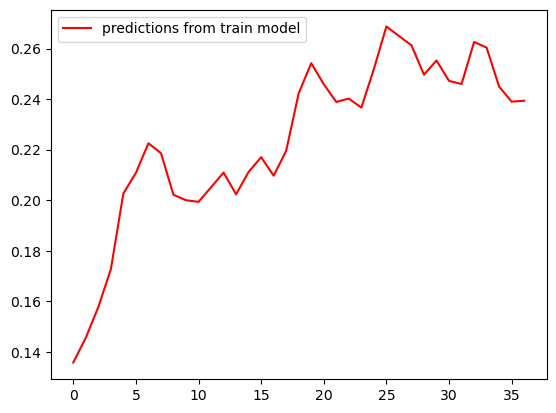

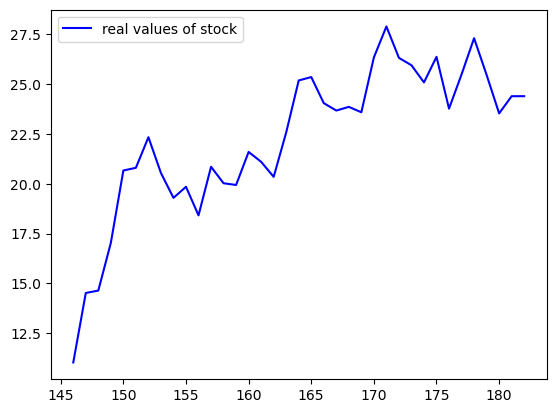

In [21]:
plt.plot(pred, color='r', label='predictions from train model')
plt.legend()
plt.show()
plt.plot(y_test, color='b', label='real values of stock')
plt.legend()
plt.show()
